In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Useful Info For loading Data
https://www.kaggle.com/dimarudov/data-analysis-using-sql

Below we connect to the database

In [2]:

path = "../input/"  #Insert path here
database = path + 'database.sqlite'

conn = sqlite3.connect(database)

We load att the games with home goal, away goal and betting odds for different companies

In [3]:

detailed_bets = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        PSH,
                                        PSD,
                                        PSA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        SJH,
                                        SJD,
                                        SJA,
                                        VCH,
                                        VCD,
                                        VCA,
                                        GBH,
                                        GBD,
                                        GBA,
                                        BSH,
                                        BSD,
                                        BSA
                                        
                                        
                                FROM Match;""", conn)

detailed_bets.shape

(25979, 32)

We check all the columns and see if there are lots of NaNs, we noticed that certain betting companies have lots of them

In [4]:
detailed_bets.isna().sum()

home_team_goal        0
away_team_goal        0
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA                3423
PSH               14811
PSD               14811
PSA               14811
WHH                3408
WHD                3408
WHA                3408
SJH                8882
SJD                8882
SJA                8882
VCH                3411
VCD                3411
VCA                3411
GBH               11817
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
dtype: int64

We are dropping GB, BS, and PS betting companies because they have lots of nulls

In [5]:
detailed_bets_filtered = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        VCH,
                                        VCD,
                                        VCA
                                        
                                        
                                FROM Match;""", conn)

We drop all the matches that have lots of naans and get 17 000 games

In [6]:
cleaned_bets = detailed_bets_filtered.dropna(thresh=20) #drops vals if there are more than 1 Nan

cleaned_bets.shape

(22432, 20)

In [7]:
cleaned_bets['result'] = 0
cleaned_bets.loc[detailed_bets['home_team_goal'] < detailed_bets['away_team_goal'], 'result'] = -1
cleaned_bets.loc[detailed_bets['home_team_goal'] > detailed_bets['away_team_goal'], 'result'] = 1
cleaned_bets


C:\Users\Mete\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mete\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


home_team_goal  away_team_goal  B365H  B365D  B365A   BWH    BWD  \
0                   1               1   1.73   3.40   5.00  1.75   3.35   
1                   0               0   1.95   3.20   3.60  1.80   3.30   
2                   0               3   2.38   3.30   2.75  2.40   3.30   
3                   5               0   1.44   3.75   7.50  1.40   4.00   
4                   1               3   5.00   3.50   1.65  5.00   3.50   
5                   1               1   4.75   3.40   1.67  4.85   3.40   
6                   2               2   2.10   3.20   3.30  2.05   3.25   
7                   1               2   3.20   3.40   2.20  2.55   3.30   
8                   1               0   2.25   3.25   2.88  2.30   3.25   
9                   4               1   1.30   5.25   9.50  1.25   5.00   
10                  1               2   1.30   5.25   9.50  1.25   5.00   
11                  0               2   2.60   3.20   2.50  2.60   3.20   
12                  0               0   1.91   3.40   4.00  1.85   3.35   
13                  2               2   2.90   3.30   2.38  2.75   3.30   
14                  1               2   1.70   3.30   4.50  1.75   3.45   
15                  0               1   2.35   3.30   3.00  2.35   3.25   
16                  1               3   6.00   3.75   1.57  5.10   3.60   
17                  1               3   4.00   3.25   1.83  4.30   3.50   
18                  2               3   1.36   4.75   8.50  1.25   5.00   
19                  0               0   2.40   3.30   2.90  2.25   3.20   
20                  2               2   3.20   3.30   2.25  3.25   3.20   
21                  2               0   1.75   3.75   4.33  1.85   3.35   
22                  1               1   1.40   4.33   8.00  1.38   4.00   
23                  1               2   1.83   3.50   4.20  1.80   3.35   
24                  0               0   2.00   3.50   3.60  1.95   3.25   
25                  1               0   2.70   3.25   2.60  2.50   3.30   
26                  1               3   3.60   3.30   2.05  3.40   3.25   
27                  1               1   2.30   3.25   2.90  2.20   3.15   
28                  1               1   1.25   5.25  10.00  1.23   5.00   
29                  2               2   2.00   3.25   3.50  2.10   3.20   
...               ...             ...    ...    ...    ...   ...    ...   
24527               2               1   4.00   3.60   1.91  4.20   3.50   
24528               0               2   2.10   3.30   3.75  2.10   3.00   
24529               0               0   1.44   4.50   7.50  1.50   4.10   
24530               1               0   4.33   3.40   1.91  4.40   3.50   
24531               1               1   3.20   3.30   2.30  3.10   3.10   
24532               3               1   2.38   3.10   3.30  2.40   3.10   
24533               3               1   2.30   3.30   3.20  2.30   3.40   
24534               1               1   2.60   3.20   2.80  2.60   3.00   
24535               1               2   2.00   3.30   4.00  2.00   3.20   
24536               0               2   2.20   3.50   3.20  2.10   3.40   
24537               5               2   1.14   9.00  15.00  1.17   8.25   
24538               1               1   3.60   3.40   2.10  3.40   3.30   
24539               4               0   2.15   3.20   3.60  2.15   3.10   
24540               1               2   2.00   3.50   3.75  2.05   3.40   
24541               3               0   1.08  12.00  23.00  1.10  10.50   
24542               0               2   4.00   3.20   2.05  3.70   3.25   
24543               3               0   1.62   3.75   6.00  1.65   3.80   
24544               2               2   2.70   3.10   2.80  2.75   2.95   
24545               3               3   2.00   3.20   4.20  2.05   3.20   
24546               1               3   2.00   3.30   4.00  2.10   3.20   
24547               3               1   1.11  10.00  19.00  1.11   9.50   
24548               5           

In [8]:
bets_percentage = cleaned_bets[cleaned_bets.columns[2:20]] #take all the COLUMNS and take the reciprocal

In [9]:
bets_percentage = bets_percentage[bets_percentage.columns].rdiv(1)
bets_percentage

B365H     B365D     B365A       BWH       BWD       BWA       IWH  \
0      0.578035  0.294118  0.200000  0.571429  0.298507  0.238095  0.540541   
1      0.512821  0.312500  0.277778  0.555556  0.303030  0.253165  0.526316   
2      0.420168  0.303030  0.363636  0.416667  0.303030  0.392157  0.384615   
3      0.694444  0.266667  0.133333  0.714286  0.250000  0.147059  0.714286   
4      0.200000  0.285714  0.606061  0.200000  0.285714  0.625000  0.250000   
5      0.210526  0.294118  0.598802  0.206186  0.294118  0.606061  0.270270   
6      0.476190  0.312500  0.303030  0.487805  0.307692  0.317460  0.540541   
7      0.312500  0.294118  0.454545  0.392157  0.303030  0.416667  0.416667   
8      0.444444  0.307692  0.347222  0.434783  0.307692  0.370370  0.476190   
9      0.769231  0.190476  0.105263  0.800000  0.200000  0.100000  0.769231   
10     0.769231  0.190476  0.105263  0.800000  0.200000  0.100000  0.769231   
11     0.384615  0.312500  0.400000  0.384615  0.312500  0.416667  0.416667   
12     0.523560  0.294118  0.250000  0.540541  0.298507  0.263158  0.555556   
13     0.344828  0.303030  0.420168  0.363636  0.303030  0.444444  0.400000   
14     0.588235  0.303030  0.222222  0.571429  0.289855  0.250000  0.588235   
15     0.425532  0.303030  0.333333  0.425532  0.307692  0.370370  0.454545   
16     0.166667  0.266667  0.636943  0.196078  0.277778  0.645161  0.217391   
17     0.250000  0.307692  0.546448  0.232558  0.285714  0.595238  0.270270   
18     0.735294  0.210526  0.117647  0.800000  0.200000  0.111111  0.769231   
19     0.416667  0.303030  0.344828  0.444444  0.312500  0.357143  0.454545   
20     0.312500  0.303030  0.444444  0.307692  0.312500  0.476190  0.322581   
21     0.571429  0.266667  0.230947  0.540541  0.298507  0.273973  0.571429   
22     0.714286  0.230947  0.125000  0.724638  0.250000  0.138889  0.714286   
23     0.546448  0.285714  0.238095  0.555556  0.298507  0.256410  0.540541   
24     0.500000  0.285714  0.277778  0.512821  0.307692  0.294118  0.500000   
25     0.370370  0.307692  0.384615  0.400000  0.303030  0.408163  0.408163   
26     0.277778  0.303030  0.487805  0.294118  0.307692  0.512821  0.256410   
27     0.434783  0.307692  0.344828  0.454545  0.317460  0.333333  0.500000   
28     0.800000  0.190476  0.100000  0.813008  0.200000  0.100000  0.769231   
29     0.500000  0.307692  0.285714  0.476190  0.312500  0.312500  0.500000   
...         ...       ...       ...       ...       ...       ...       ...   
24527  0.250000  0.277778  0.523560  0.238095  0.285714  0.526316  0.285714   
24528  0.476190  0.303030  0.266667  0.476190  0.333333  0.263158  0.476190   
24529  0.694444  0.222222  0.133333  0.666667  0.243902  0.160000  0.645161   
24530  0.230947  0.294118  0.523560  0.227273  0.285714  0.540541  0.238095   
24531  0.312500  0.303030  0.434783  0.322581  0.322581  0.408163  0.363636   
24532  0.420168  0.322581  0.303030  0.416667  0.322581  0.333333  0.416667   
24533  0.434783  0.303030  0.312500  0.434783  0.294118  0.312500  0.434783   
24534  0.384615  0.312500  0.357143  0.384615  0.333333  0.350877  0.384615   
24535  0.500000  0.303030  0.250000  0.500000  0.312500  0.256410  0.526316   
24536  0.454545  0.285714  0.312500  0.476190  0.294118  0.303030  0.454545   
24537  0.877193  0.111111  0.066667  0.854701  0.121212  0.074074  0.854701   
24538  0.277778  0.294118  0.476190  0.294118  0.303030  0.454545  0.312500   
24539  0.465116  0.312500  0.277778  0.465116  0.322581  0.277778  0.476190   
24540  0.500000  0.285714  0.266667  0.487805  0.294118  0.285714  0.500000   
24541  0.925926  0.083333  0.043478  0.909091  0.095238  0.043478  0.934579   
24542  0.250000  0.312500  0.487805  0.270270  0.307692  0.476190  0.303030   
24543  0.617284  0.266667  0.166667  0.606061  0.263158  0.181818  0.625000   
24544  0.370370  0.322581  0.357143  0.363636  0.338983  0.344828  0.384615   
24545  0.500000  0.312500  0.238095  0.487805  0.312500  0.2

It does not add up to 1 because the odds are rigged!!!!!!!!!!!!!!!! /n
There are two ways to fix this, we can either normalize or try to estimate the bookkeepers unbiased part or just leave it without /n
Below will have normalized data


In [10]:
#split data into 3 column section each
#after splitting normalize each part by the sum of the rows
split_data = np.zeros((22432,3,6))
perc_odds = []
for i in range(0,6):
    start = i*3
    end = start+3
    bs=bets_percentage[bets_percentage.columns[start:end]]
    split_data[:,:,i] = (bs.T/bs.sum(axis=1)).T 

In [11]:
norm_perc_data = np.vstack(split_data.T).T

In [12]:
norm_perc = pd.DataFrame(norm_perc_data,columns = bets_percentage.columns);

Below is normalized data for bets

In [13]:
norm_perc

B365H     B365D     B365A       BWH       BWD       BWA       IWH  \
0      0.539135  0.274324  0.186541  0.515715  0.269403  0.214881  0.474677   
1      0.464891  0.283293  0.251816  0.499712  0.272570  0.227717  0.468032   
2      0.386598  0.278819  0.334583  0.374749  0.272545  0.352705  0.336797   
3      0.634518  0.243655  0.121827  0.642722  0.224953  0.132325  0.628019   
4      0.183188  0.261697  0.555115  0.180064  0.257235  0.562701  0.219055   
5      0.190790  0.266545  0.542666  0.186363  0.265842  0.547795  0.237428   
6      0.436183  0.286245  0.277571  0.438296  0.276464  0.285240  0.474677   
7      0.294488  0.277165  0.428346  0.352705  0.272545  0.374749  0.363636   
8      0.404276  0.279883  0.315841  0.390695  0.276492  0.332814  0.420624   
9      0.722303  0.178856  0.098841  0.727273  0.181818  0.090909  0.679337   
10     0.722303  0.178856  0.098841  0.727273  0.181818  0.090909  0.679337   
11     0.350570  0.284838  0.364592  0.345324  0.280576  0.374101  0.363636   
12     0.490373  0.275474  0.234153  0.490417  0.270827  0.238756  0.486777   
13     0.322864  0.283729  0.393406  0.327273  0.272727  0.400000  0.348650   
14     0.528282  0.272145  0.199573  0.514206  0.260829  0.224965  0.516526   
15     0.400729  0.285367  0.313904  0.385587  0.278809  0.335604  0.400739   
16     0.155723  0.249157  0.595120  0.175224  0.248234  0.576543  0.191280   
17     0.226420  0.278671  0.494908  0.208851  0.256589  0.534560  0.237428   
18     0.691412  0.197962  0.110626  0.720000  0.180000  0.100000  0.679337   
19     0.391411  0.284663  0.323926  0.398931  0.280499  0.320570  0.400739   
20     0.294818  0.285884  0.419297  0.280643  0.285028  0.434329  0.284939   
21     0.534524  0.249444  0.216032  0.485652  0.268196  0.246152  0.503937   
22     0.667412  0.215791  0.116797  0.650759  0.224512  0.124729  0.628019   
23     0.510576  0.266958  0.222465  0.500287  0.268811  0.230902  0.474677   
24     0.470149  0.268657  0.261194  0.460081  0.276049  0.263870  0.440497   
25     0.348525  0.289544  0.361930  0.359973  0.272707  0.367320  0.358382   
26     0.259942  0.283573  0.456484  0.263870  0.276049  0.460081  0.226737   
27     0.399873  0.282987  0.317140  0.411227  0.287206  0.301567  0.440497   
28     0.733624  0.174672  0.091703  0.730460  0.179693  0.089847  0.679337   
29     0.457286  0.281407  0.261307  0.432432  0.283784  0.283784  0.440497   
...         ...       ...       ...       ...       ...       ...       ...   
22402  0.237792  0.264214  0.497994  0.226730  0.272076  0.501193  0.264591   
22403  0.455298  0.289735  0.254967  0.443925  0.310748  0.245327  0.440000   
22404  0.661376  0.211640  0.126984  0.622722  0.227825  0.149453  0.599047   
22405  0.220238  0.280479  0.499283  0.215725  0.271198  0.513077  0.220588   
22406  0.297530  0.288514  0.413955  0.306250  0.306250  0.387500  0.337909   
22407  0.401775  0.308460  0.289765  0.388471  0.300752  0.310777  0.384615   
22408  0.413955  0.288514  0.297530  0.417498  0.282425  0.300077  0.401595   
22409  0.364821  0.296417  0.338762  0.359848  0.311869  0.328283  0.355556   
22410  0.474820  0.287770  0.237410  0.467766  0.292354  0.239880  0.487633   
22411  0.431766  0.271396  0.296839  0.443654  0.274021  0.282325  0.421053   
22412  0.831486  0.105322  0.063193  0.814011  0.115442  0.070548  0.791408   
22413  0.265033  0.280624  0.454343  0.279661  0.288136  0.432203  0.289474   
22414  0.440704  0.296098  0.263198  0.436534  0.302758  0.260708  0.440000   
22415  0.475113  0.271493  0.253394  0.456902  0.275485  0.267614  0.462617   
22416  0.879541  0.079159  0.041300  0.867613  0.090893  0.041495  0.861128   
22417  0.238026  0.297533  0.464441  0.256386  0.291886  0.451728  0.280000   
22418  0.587544  0.253819  0.158637  0.576631  0.250379  0.172989  0.578460   
22419  0.352702  0.307192  0.340106  0.347164  0.323628  0.329208  0.355556   
22420  0.475921  0.297450  0.226629  0.455647  0.291899  0.2

In [14]:
labels_game = cleaned_bets['result']
labels_game.values

array([ 0,  0, -1, ...,  1,  0,  1], dtype=int64)

In [16]:
from collections import Counter
freqs = Counter(labels_game.values)

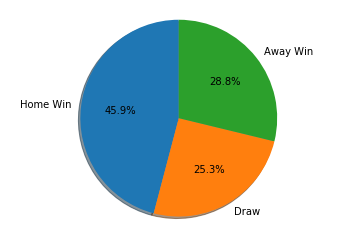

In [17]:
labels = 'Home Win','Draw','Away Win'
fig1, ax1 = plt.subplots()
ax1.pie((freqs[1],freqs[0],freqs[-1]), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

No handles with labels found to put in legend.


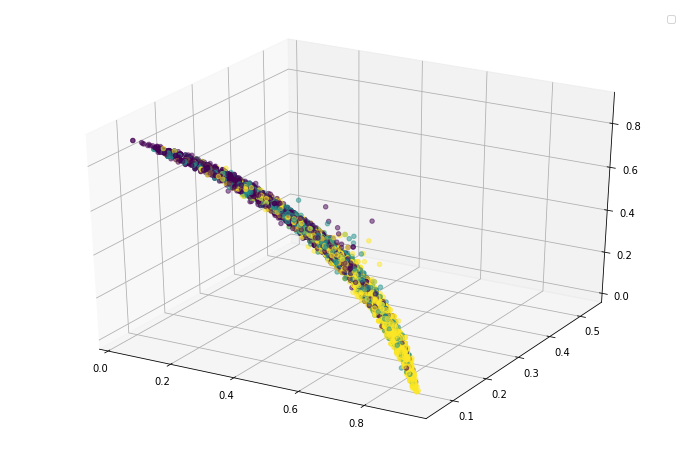

In [18]:
X = norm_perc[norm_perc.columns[0:3]].values
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],alpha=0.5, c=labels_game.values)
ax.legend(('Win','Draw','Lose'));
plt.legend(loc='best')
plt.show()

In [ ]:
# Build classifiers
gnb = GaussianNB()
qda = QDA()
lda = LDA()
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# Train and Evaluate
names = ['GaussianNB', 'QDA' , 'LDA', 'kNN']
classifiers = [gnb, qda , lda, knn]

# create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

h = 0.1  # step size in the mesh

for ind in [0,1]:
    x_min, x_max = X_test[ind][:,0].min()-1, X_test[ind][:,0].max()+1
    y_min, y_max = X_test[ind][:,1].min()-1, X_test[ind][:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(xx.shape, yy.shape)
    grid = np.c_[xx.ravel(), yy.ravel()]

    labels = ['gnb', 'qda']
    models = [gnb, qda]
    plt.figure(figsize=(12,5))
    counter=1
    for label, clf in zip(labels, models):
        plt.subplot(1,2,counter)
        counter+=1
        clf.fit(X_train[ind], y_train[ind])
        yhat = clf.predict(X_test[ind])

        ZZ = clf.predict(grid)
        ZZ = ZZ.reshape(xx.shape) # 2-D grid layout

        # Plot the decision boundary. For that, we will assign a color to each grid point
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X_test[ind][:,0], X_test[ind][:,1], c=yhat, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(label + '\nError Rate = {:0.2f}%'.format((yhat != y_test[ind]).sum() * 100 / len(y_test[ind])))
    plt.show()